In [96]:
import networkx as nx
import matplotlib as plot
import json
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter

In [ ]:
#<k> = p * (n - 1)
#

In [5]:
p_1 = .5 / 300
p_2 = 2 / 300
p_3 = 10 / 300

In [10]:
graph1 = nx.erdos_renyi_graph(300, p_1) 
graph2 = nx.erdos_renyi_graph(300, p_2) 
graph3 = nx.erdos_renyi_graph(300, p_3) 

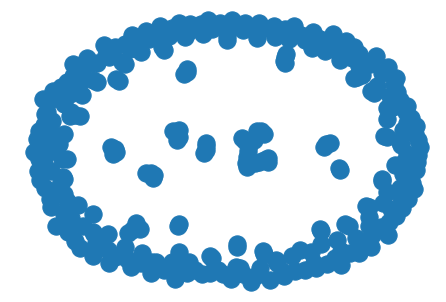

In [37]:
nx.draw(graph1)

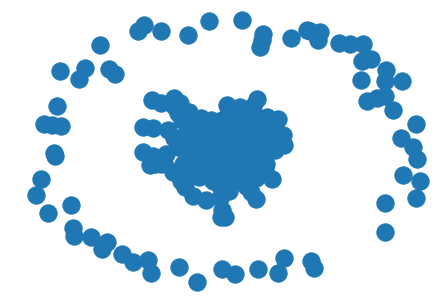

In [14]:
nx.draw(graph2)

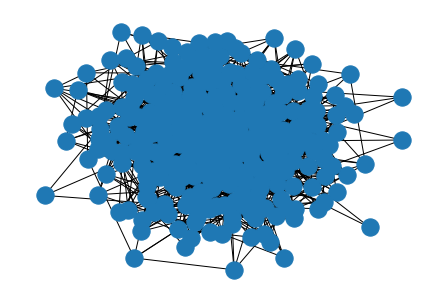

In [15]:
nx.draw(graph3)

In [101]:
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return nx.json_graph.node_link_graph(js_graph,direct=True, multigraph=False)

In [80]:
star_wars = read_json_file(r'/home/v/Downloads/1.json')
random_compare = nx.erdos_renyi_graph(22, .10, directed=True) 

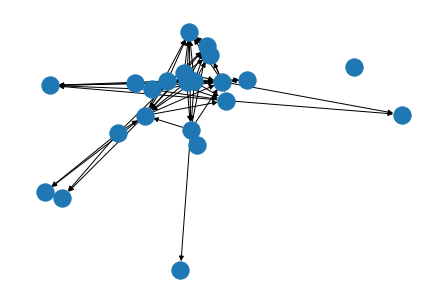

In [78]:
nx.draw(star_wars)

In [59]:
star_wars.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21))

In [72]:
star_wars.edges

OutEdgeView([(1, 0), (1, 10), (1, 3), (1, 13), (1, 7), (2, 0), (2, 1), (2, 3), (2, 9), (2, 7), (2, 10), (2, 13), (2, 19), (3, 0), (3, 9), (3, 10), (3, 18), (3, 19), (3, 20), (4, 7), (4, 11), (4, 12), (4, 10), (5, 3), (6, 0), (6, 5), (6, 3), (6, 7), (6, 19), (6, 2), (6, 18), (6, 17), (7, 0), (7, 3), (7, 10), (7, 11), (7, 12), (7, 19), (8, 0), (8, 3), (8, 9), (8, 2), (8, 7), (9, 0), (10, 0), (11, 12), (13, 0), (13, 10), (13, 3), (13, 15), (13, 7), (14, 13), (16, 17), (16, 18), (16, 3), (17, 18), (17, 3), (17, 19), (19, 18), (19, 20)])

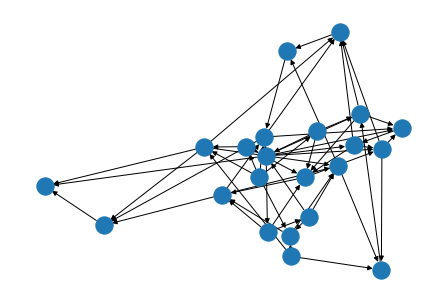

In [81]:
nx.draw(random_compare)

In [82]:
nx.average_clustering(star_wars)

0.3319362455726092

In [89]:
total = 0
for i in range(len(star_wars.degree)):
    total += star_wars.degree[i]
               
total/ len(star_wars.degree)

5.454545454545454

In [83]:
nx.average_clustering(random_compare)

0.11370851370851373

In [87]:


total = 0
for i in range(len(random_compare.degree)):
    total += random_compare.degree[i]
               
total/ len(random_compare.degree)

5.181818181818182

In [ ]:
#B

# We see that for the star wars network we observe <k> = 5.45 
#and that c_avg = .33 in the random erdos renyi graph we 
#observe <k> = 5.18 and c_avg = 0.11



#C
#While the star wars and random graph observe and 
#fairly similar average degree 
#distribution which is entirely feasible to reproduce 
#in the random network because this metric can be 
#synthetically replicated by <k> = p * (n - 1), 
#the erdos renyi random graph models seems to not be 
#able to accuratly replicate the average clustering coefficient
# seen in the real star wars network, perhaps the properties 
#of the erdos renyi cannot accuratly reproduce the 
#avgerage clustering coefficient

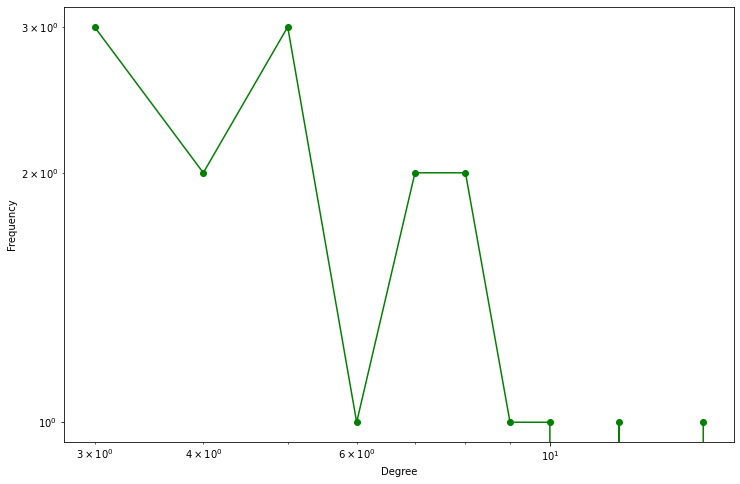

In [99]:
m=3
G = star_wars

degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')

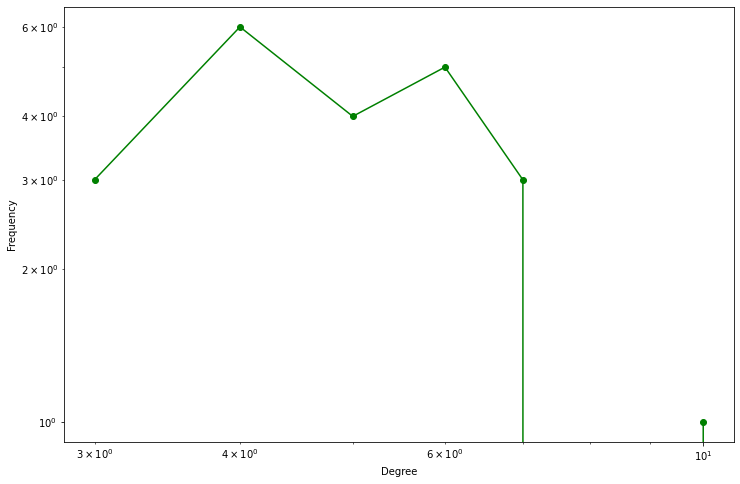

In [98]:
m=3
G = random_compare

degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')

In [ ]:
#E

#While the dstribution is sparse, not sure if this
#is in-degree or out degree, it seems like 
# the random erdos renyi can't capture hubs 
#that contain more than 10 neighbors which exist 
#on the real star wars network, this is due to 
#the gaussian or poisson estimation not 
#being able to cature 'extreme' values at the tail ends 